In [5]:
import PIL.Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import cv2
import dlib
import os
import keras
from keras.models import load_model
import keyboard
from fer import FER
from multiprocessing import Process

In [10]:
path = r"C:\Users\KIIT\Downloads\testing_images"

def analyze():
    print("analyzer is called")
    for image in os.listdir(path):
            imgPath = path+"\\"+image
            print(imgPath)
            try:
                image1 = face_recognition.load_image_file(imgPath)

                encoding_1 = face_recognition.face_encodings(image1)[0]

                encoding_2 = face_recognition.face_encodings(img)[0]

                results = face_recognition.compare_faces([encoding_1], encoding_2,tolerance=0.50)
                print(results)
                if results[0] == True:
                    plt.imshow(image1)
                    break
            except:
                pass

def emotion(img, model):
#     print(model.detect_emotions(img))
    emotion, score = model.top_emotion(img)
    print("The detected Emotion is " + emotion + " and the score is as " + str(score))

analyzer is called
C:\Users\KIIT\Downloads\testing_images\IMG_20201219_220124.jpg
C:\Users\KIIT\Downloads\testing_images\IMG_20210403_152253.jpg
C:\Users\KIIT\Downloads\testing_images\SquarePic_20190704_02374032.jpg
[True]
The detected Emotion is happy and the score is as 0.91
The detected Emotion is neutral and the score is as 0.82
The detected Emotion is neutral and the score is as 0.81
The detected Emotion is neutral and the score is as 0.66
The detected Emotion is neutral and the score is as 0.74
The detected Emotion is neutral and the score is as 0.34
The detected Emotion is neutral and the score is as 0.67
The detected Emotion is neutral and the score is as 0.57
The detected Emotion is neutral and the score is as 0.49
The detected Emotion is sad and the score is as 0.45


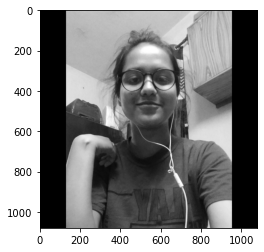

In [11]:
model = FER()
cap = cv2.VideoCapture(0)
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
count = 0
while cap.isOpened():
    _, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    imgBlack = np.zeros((480, 640), np.uint8)
        
    try:
        if keyboard.is_pressed('a'):
            analyze()
            
        if keyboard.is_pressed('s'):
            emotion(img, model)
            
    except Exception as e:
        print(e)
            
    for face in faces:
        landmarks = predictor(gray, face)
        for n in range(68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            cv2.circle(imgBlack, (x, y), 1, (255, 255, 255), -1)
            
            i = n
            if i > 0 and i != 17 and i != 27 and i != 36 and i != 42 and i != 48:
                cv2.line(imgBlack, (landmarks.part(i).x, landmarks.part(i).y),
                         (landmarks.part(i - 1).x, landmarks.part(i - 1).y), (255, 255, 255), 1)

    cv2.imshow('landmarks', imgBlack)
    cv2.imshow('image', img)
    if cv2.waitKey(1) == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break